# Navigating Financial Instability: The March 2023 Collapse of Silicon Valley Bank and the Role of AI/ML in Identifying Risks

## Introduction:

In March 2023, as a fresh graduate, you've embarked on an exciting journey with the Federal Reserve (the Fed). The Fed's crucial task is to maintain the overall stability of the financial system, including the regulation of key non-bank financial institutions.

## SVB Collapse - March 2023:

Bank Run and Failure: On March 10, 2023, Silicon Valley Bank (SVB) collapsed after a bank run, following its announcement to sell assets and raise funds due to significant losses. This led to a huge withdrawal of customer funds, and the California Department of Financial Protection and Innovation subsequently placed SVB under the FDIC's receivership.

Background: Founded in 1983, SVB, a major player in the tech sector, saw its deposits skyrocket from \$62 billion in 2020 to \$124 billion in 2021. The bank's strategy to invest in long-term Treasury bonds backfired as rising interest rates led to a drop in bond values, causing substantial unrealized losses.

Impact: The collapse heavily impacted startups and larger tech firms worldwide, disrupting access to funds and affecting various industries.
Regulatory and Risk Management Issues: Critiques arose over the bank's risk management, citing reduced stress testing under 2018's Economic Growth, Regulatory Relief, and Consumer Protection Act. A 2021 Federal Reserve review highlighted deficiencies in SVB's risk management.

Recovery Efforts: The FDIC, supported by the Treasury, insured all SVB deposits to mitigate broader financial instability. SVB's assets were transferred to Silicon Valley Bridge Bank, N.A., and later acquired by First Citizens BancShares.



## Your Task at the Fed:

Using AI/ML tools, your assignment is to identify financial firms at risk.

* Exploratory Data Analysis: You have gathered data on publicly traded companies, some of which operate in the Financial Sector, while others do not.

* Classification Task: The initial step is to categorize these companies to determine which are Financial firms under the Fed's supervision. In the training set, a human expert has already classified firms as 'FinancialSector' or not. This classification is missing in the test set, and your objective is to predict this categorization for the test set and automate the process for future datasets.

* Risk Prediction: Subsequently, your aim is to predict 'FinancialRisk'. This involves identifying firms not in the Financial Sector as zero risk and assigning a risk score (with 1 being the highest) to firms within the Financial Sector, based on the manual calculations by a human expert in the training set. Your goal is to predict this for the test set and automate the process for future assessments.

* Presentation:
  * Introduction
  * EDA
  * Feature selection
  * Model Selection
    * Hyper-Parameter tuning
    * Model variance vs bias
  * Final model
  * Feature Importance/Explainability
  * Conclusion



This assignment is critical for maintaining the stability of the financial markets, especially in the aftermath of significant events like the SVB collapse.

Here's a data description for your dataset:

* url: The web address providing earnings call transcript
* call_transcript: Text of earnings call transcript. Features can be engineered via Natural Language Processing techniques.
* VWAP: Volume Weighted Average Price of the company's stock.
* exchangeCountry: Country where the company's stock is listed.
* securityType: Type of security issued by the company (e.g., stock, bond).
* CIK: Central Index Key, a unique identifier assigned by the SEC.
* name: The name of the company.
* securityID: A unique identifier for the security.
* incorporationCountry: Country where the company is incorporated.
* exchangeName: Name of the stock exchange where the company is listed.
* exchangeID: Unique identifier for the stock exchange.
* Accrual Ratio: Financial metric indicating the quality of earnings.
* Assets: Total assets of the company.
* B/P: Book-to-Price ratio.
* CF/P: Cash Flow to Price ratio.
* Capital Expenditure: Funds used by a company to acquire or upgrade physical assets.
* Cash: Total cash holdings.
* Debt/Equity: Ratio comparing the company's total liabilities to its shareholder equity.
* Depreciation: The allocation of the cost of assets over time.
* Dividend: Dividend payments to shareholders.
* E/P: Earnings to Price ratio.
* EBIT: Earnings Before Interest and Taxes.
* EBIT/P: EBIT to Price ratio.
* EBIT/TEV: EBIT to Total Enterprise Value ratio.
* Earnings: Total earnings of the company.
* Earnings Growth (1Y to 5Y): Earnings growth over 1 to 5-year periods.
* Earnings Variability: Fluctuations in earnings over time.
* Equity: Shareholder's equity in the company.
* FCF: Free Cash Flow.
* FCF/P: Free Cash Flow to Price ratio.
* Income Tax: Total income tax paid.
* Interest Expense: Costs of interest paid on debts.
* Long Liabilities: Long-term financial obligations.
* Long Term Debt: Debt that is due in more than one year.
* Market Cap: Market capitalization.
* Minority Interest: Portion of subsidiaries not owned by the parent company.
* Operating Cash Flow: Cash generated from operating activities.
* Operating Expense: Expenses incurred from normal business operations.
* Operating Income: Profit realized from business operations.
* Operating Income Before Depreciation: Operating income before accounting for depreciation.
* Operating Margin: Operating income divided by net sales.
* Preferred Stock: Stock with priority over common stock in dividend payment.
* Profit Margin: Net income divided by revenue.
* R&D: Research and Development expenses.
* R&D/Sales: Ratio of R&D expenses to sales.
* ROA: Return on Assets.
* ROE: Return on Equity.
* S/P: Sales to Price ratio.
* SG&A: Selling, General, and Administrative expenses.
* SG&A/Sales: Ratio of SG&A to sales.
* Sales: Total sales revenue.
* Sales Growth (1Y to 5Y): Sales growth over 1 to 5-year periods.
* Sales Variability: Fluctuations in sales over time.
* Short Term Debt: Debt that is due within one year.
* TEV: Total Enterprise Value.
* Working Capital: Capital used in day-to-day operations.
* businessDescription: A brief description of the company's business.
* close: Closing price of the company's stock. This is useful if you need to engineer a feature, e.g. to calculate Sales-To-Price, by dividing 'Sales' by 'close'.
* dividendFactor: Factor determining the dividend payout.
* fiscalDint: Fiscal year distinguishing information.
* floatShares: Number of shares available for public trading.
* outstandingShares: Total shares currently held by shareholders.
* shortInterestFloat: Percentage of float shares held as short positions.

Target Variables: (training set only, you predict on the test set and submit on Kaggle)

* FinancialSector: Classification of whether the company is in the financial sector.
* FinancialRisk: Risk level assigned to the company, based on its financial profile.

In [ ]:
! gdown 1r3jZglYXj3Xi_v4I--86fpzLoqFk3PVA
! gdown 1_2aTbleEh-kRocoEgHjaVsjYrO9jP1Os

Downloading...
From: https://drive.google.com/uc?id=1r3jZglYXj3Xi_v4I--86fpzLoqFk3PVA
To: /content/20231124_Financial_Risk_Project_train.parquet
100% 9.85M/9.85M [00:00<00:00, 63.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_2aTbleEh-kRocoEgHjaVsjYrO9jP1Os
To: /content/20231124_Financial_Risk_Project_test_public.parquet
100% 2.52M/2.52M [00:00<00:00, 51.5MB/s]


In [ ]:
import pandas as pd
df_train = pd.read_parquet('20231124_Financial_Risk_Project_train.parquet')
df_test = pd.read_parquet('20231124_Financial_Risk_Project_test_public.parquet')

df_train.shape, df_test.shape

((415, 73), (104, 71))

# Kaggle (Categorization)

1. Jordan Adelphi. (2023). Navigating Financial Instability (Categorization). Kaggle. https://kaggle.com/competitions/navigating-financial-instability

2. Jordan Adelphi. (2023). Navigating Financial Instability (Regression). Kaggle. https://kaggle.com/competitions/navigating-financial-instability-regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

EDA of Financial Sector


In [ ]:
# Check basic information
print(df_train.info())
print(df_train.describe())
print(df_train.head())

<class 'pandas.core.frame.DataFrame'>
Index: 415 entries, FICO to GBCI
Data columns (total 73 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   url                                   415 non-null    object 
 1   call_transcript                       415 non-null    object 
 2   VWAP                                  415 non-null    float64
 3   exchangeCountry                       415 non-null    object 
 4   securityType                          415 non-null    object 
 5   CIK                                   415 non-null    object 
 6   name                                  415 non-null    object 
 7   securityID                            415 non-null    int64  
 8   incorporationCountry                  415 non-null    object 
 9   exchangeName                          415 non-null    object 
 10  exchangeID                            412 non-null    object 
 11  Accrual Ratio       

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

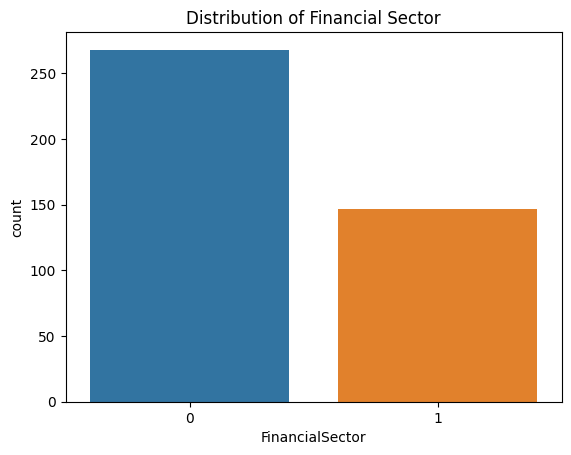

In [ ]:
# Visualize the distribution of the target variable
sns.countplot(x='FinancialSector', data=df_train)
plt.title('Distribution of Financial Sector')
plt.show()

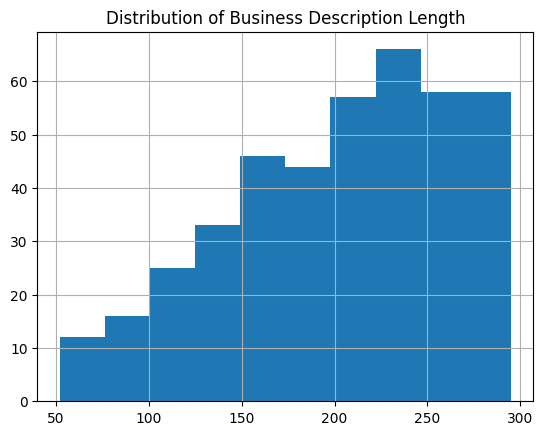

In [ ]:
# Analyze text feature
df_train['businessDescription'].str.len().hist()
plt.title('Distribution of Business Description Length')
plt.show()

Feature Selection

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Assuming df_train is your training dataset

# Select relevant features for analysis
selected_features = [
    'VWAP', 'Accrual Ratio', 'B/P', 'CF/P', 'Capital Expenditure', 'Cash', 'Debt/Equity', 'Depreciation',
    'Dividend', 'E/P', 'EBIT', 'EBIT/P', 'EBIT/TEV', 'Earnings','Earnings Growth (1Y)','Earnings Growth (2Y)','Earnings Growth (3Y)', 'Earnings Growth (4Y)', 'Earnings Growth (5Y)', 'Earnings Variability',
    'Equity', 'FCF', 'FCF/P', 'Income Tax', 'Interest Expense', 'Long Liabilities', 'Long Term Debt', 'Market Cap',
    'Operating Cash Flow', 'Operating Expense', 'Operating Income', 'Operating Income Before Depreciation',
    'Operating Margin', 'Profit Margin', 'R&D', 'ROA', 'ROE', 'S/P', 'SG&A', 'Sales', 'Sales Growth (1Y)','Sales Growth (2Y)','Sales Growth (3Y)', 'Sales Growth (4Y)', 'Sales Growth (5Y)',
    'Sales Variability', 'Short Term Debt', 'TEV', 'Working Capital'
]

# Extract selected features in the training set
df_train_selected = df_train[selected_features + ['FinancialSector']]

# Handle missing values with imputation
numeric_imputer = SimpleImputer(strategy='mean')
df_train_selected[selected_features] = numeric_imputer.fit_transform(df_train_selected[selected_features])

# Separate features and target variable
X_train = df_train_selected[selected_features]
y_train = df_train_selected['FinancialSector']

# Standardize numeric features
scaler = StandardScaler()
X_train[selected_features] = scaler.fit_transform(X_train[selected_features])

# Select K best features based on correlation with the target variable
selector = SelectKBest(score_func=f_regression, k=15)  # You can adjust the value of k as needed
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature names
selected_feature_names = X_train.columns[selector.get_support()]

# Train a model to see feature importance
model = RandomForestRegressor(random_state=42)
model.fit(X_train_selected, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({'Feature': selected_feature_names, 'Importance': feature_importances})

# Display or save the feature importance DataFrame
print(feature_importance_df)


<ipython-input-8-94b4c0c7534e>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_selected[selected_features] = numeric_imputer.fit_transform(df_train_selected[selected_features])
<ipython-input-8-94b4c0c7534e>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[selected_features] = scaler.fit_transform(X_train[selected_features])


                 Feature  Importance
0                    B/P    0.014371
1                   CF/P    0.016333
2    Capital Expenditure    0.040841
3           Depreciation    0.108493
4   Earnings Growth (3Y)    0.022311
5   Earnings Growth (5Y)    0.012899
6                  FCF/P    0.011037
7       Long Liabilities    0.362171
8      Operating Expense    0.042569
9                    R&D    0.006208
10                  SG&A    0.117956
11                 Sales    0.018740
12     Sales Growth (4Y)    0.013936
13       Short Term Debt    0.014845
14       Working Capital    0.197290


Classification

In [ ]:
# Select features; will be using all features with .1 or higher importance score as well as businessDescription
#Feature Selection

selected_features = ['businessDescription', 'Depreciation', 'Long Liabilities', 'SG&A', 'Working Capital']

# Create feature matrix and target variable
X_train = df_train[selected_features]
y_train = df_train['FinancialSector']
X_test = df_test[selected_features]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Text feature processing
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_text = vectorizer.fit_transform(X_train['businessDescription'])
X_test_text = vectorizer.transform(X_test['businessDescription'])


In [ ]:
from scipy.sparse import hstack

# Combine features
X_train_combined = hstack([X_train_text, X_train.drop('businessDescription', axis=1)])
X_test_combined = hstack([X_test_text, X_test.drop('businessDescription', axis=1)])


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the training data for validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_combined, y_train, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_split, y_train_split)

# Validate the model
val_predictions = clf.predict(X_val_split)
accuracy = accuracy_score(y_val_split, val_predictions)
print(f'Validation Accuracy: {accuracy}')


Validation Accuracy: 0.963855421686747


In [ ]:
# Make predictions on the test set
test_predictions = clf.predict(X_test_combined)

# Assign predictions to the test dataset
df_test['FinancialSector'] = test_predictions


In [ ]:
df_test_dropcall = df_test.drop('call_transcript', axis=1)
df_test_dropcall.to_csv('Classification_try2.csv', index=True)

Fine Tuning Hyper Paremeters

Using Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the grid search model
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,  # Adjust the number of folds as needed
                           scoring='accuracy',
                           verbose=2,
                           n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_combined, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [ ]:
best_params = grid_search.best_params_

final_model = RandomForestClassifier(random_state=42, **best_params)
final_model.fit(X_train_combined, y_train)

# Make predictions on the test set
test_predictions = final_model.predict(X_test_combined)

# Assign predictions to the test dataset
df_test['FinancialSector'] = test_predictions


In [ ]:
df_test_dropcall = df_test.drop('call_transcript', axis=1)
df_test_dropcall.to_csv('Classification_gridsearch.csv', index=True)

Model Assessment

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# the true labels for the test set in y_test
y_test = df_test['FinancialSector']

# Calculate predictions
test_predictions = final_model.predict(X_test_combined)

# Evaluate accuracy
accuracy = accuracy_score(y_test, test_predictions)
print(f"Accuracy: {accuracy:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, test_predictions))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        45

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104


Confusion Matrix:
[[59  0]
 [ 0 45]]


Moving into Kaggle Regression Competition

EDA of Financial Risk

In [ ]:
# Display basic statistics of 'FinancialRisk'
print(df_train['FinancialRisk'].describe())

count    415.000000
mean       0.049077
std        0.117747
min       -0.102909
25%        0.000000
50%        0.000000
75%        0.060544
max        0.998330
Name: FinancialRisk, dtype: float64


In [ ]:
# Check for class imbalance
class_counts = df_train['FinancialRisk'].value_counts()
print('Class Counts:\n', class_counts)

Class Counts:
  0.000000    268
 0.196409      1
 0.052267      1
-0.014358      1
 0.094662      1
            ... 
 0.341410      1
 0.175727      1
 0.065527      1
 0.202973      1
 0.089905      1
Name: FinancialRisk, Length: 148, dtype: int64


Feature Selection

<ipython-input-28-2b6ad4dd1b7d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr()[['FinancialRisk']].sort_values(by='FinancialRisk', ascending=False),


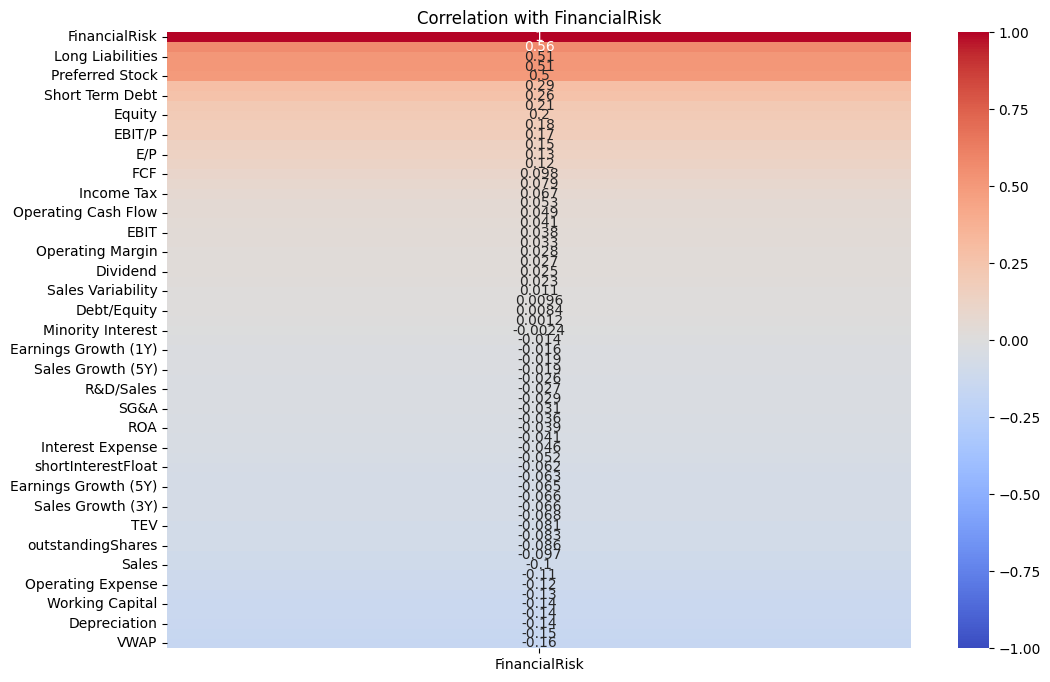

In [ ]:
# Visualize the correlation between 'FinancialRisk' and other numeric features
plt.figure(figsize=(12, 8))
sns.heatmap(df_train.corr()[['FinancialRisk']].sort_values(by='FinancialRisk', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with FinancialRisk')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Assuming df_train is your training dataset

# Select relevant features for analysis
selected_features = [
    'VWAP', 'Accrual Ratio', 'B/P', 'CF/P', 'Capital Expenditure', 'Cash', 'Debt/Equity', 'Depreciation',
    'Dividend', 'E/P', 'EBIT', 'EBIT/P', 'EBIT/TEV', 'Earnings','Earnings Growth (1Y)','Earnings Growth (2Y)','Earnings Growth (3Y)', 'Earnings Growth (4Y)', 'Earnings Growth (5Y)', 'Earnings Variability',
    'Equity', 'FCF', 'FCF/P', 'Income Tax', 'Interest Expense', 'Long Liabilities', 'Long Term Debt', 'Market Cap',
    'Operating Cash Flow', 'Operating Expense', 'Operating Income', 'Operating Income Before Depreciation',
    'Operating Margin', 'Profit Margin', 'R&D', 'ROA', 'ROE', 'S/P', 'SG&A', 'Sales', 'Sales Growth (1Y)','Sales Growth (2Y)','Sales Growth (3Y)', 'Sales Growth (4Y)', 'Sales Growth (5Y)',
    'Sales Variability', 'Short Term Debt', 'TEV', 'Working Capital'
]

# Extract selected features in the training set
df_train_selected = df_train[selected_features + ['FinancialRisk']]

# Handle missing values with imputation
numeric_imputer = SimpleImputer(strategy='mean')
df_train_selected[selected_features] = numeric_imputer.fit_transform(df_train_selected[selected_features])

# Separate features and target variable
X_train = df_train_selected[selected_features]
y_train = df_train_selected['FinancialRisk']

# Standardize numeric features
scaler = StandardScaler()
X_train[selected_features] = scaler.fit_transform(X_train[selected_features])

# Select K best features based on correlation with the target variable
selector = SelectKBest(score_func=f_regression, k=15)  # You can adjust the value of k as needed
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature names
selected_feature_names = X_train.columns[selector.get_support()]

# Train a model to see feature importance
model = RandomForestRegressor(random_state=42)
model.fit(X_train_selected, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({'Feature': selected_feature_names, 'Importance': feature_importances})

# Display or save the feature importance DataFrame
print(feature_importance_df)


<ipython-input-29-8d3fd26fd187>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_selected[selected_features] = numeric_imputer.fit_transform(df_train_selected[selected_features])
<ipython-input-29-8d3fd26fd187>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[selected_features] = scaler.fit_transform(X_train[selected_features])


                Feature  Importance
0                  VWAP    0.340014
1                   B/P    0.013030
2                  CF/P    0.015685
3   Capital Expenditure    0.025541
4                  Cash    0.015220
5          Depreciation    0.048214
6                   E/P    0.021737
7                EBIT/P    0.013120
8              EBIT/TEV    0.030090
9                Equity    0.033188
10                FCF/P    0.019405
11     Long Liabilities    0.332712
12                  R&D    0.000113
13      Short Term Debt    0.072800
14      Working Capital    0.019129


Running Regression with RandomForest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Assuming df_train contains the target variable 'FinancialRisk'
# and df_test is missing the 'FinancialRisk' column

# Selecting features with moderate or higher importance scores
selected_features = ['VWAP', 'Long Liabilities', 'Short Term Debt']

# Concatenating selected features with additional necessary columns
selected_features = ['FinancialSector'] + selected_features
df_train_selected = df_train[selected_features + ['FinancialRisk']].copy()
df_test_selected = df_test[selected_features].copy()

# Handling missing values using SimpleImputer
numeric_imputer = SimpleImputer(strategy='mean')
df_train_selected[selected_features] = numeric_imputer.fit_transform(df_train_selected[selected_features])
df_test_selected[selected_features] = numeric_imputer.transform(df_test_selected[selected_features])

# Standardizing numeric features using StandardScaler
scaler = StandardScaler()
df_train_selected[selected_features] = scaler.fit_transform(df_train_selected[selected_features])
df_test_selected[selected_features] = scaler.transform(df_test_selected[selected_features])

# Extracting features and target variable
X_train = df_train_selected[selected_features]
y_train = df_train_selected['FinancialRisk']
X_test = df_test_selected[selected_features]

# Train a RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
test_predictions = model.predict(X_test)

# Set FinancialRisk to 0 for companies not in the financial sector
test_predictions[df_test['FinancialSector'] == 0] = 0

# Assigning risk score between 0 and 1
test_predictions = test_predictions.clip(0, 1)

# Assigning risk score between 0 and 1
df_test['FinancialRisk'] = test_predictions

# Display or save the updated df_test with the predicted 'FinancialRisk' column
print(df_test[['FinancialSector', 'FinancialRisk']])

# Evaluate the model performance
mse = mean_squared_error(y_train, model.predict(X_train))
r2 = r2_score(y_train, model.predict(X_train))
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print(f'Mean Squared Error on Training Set: {mse}')
print(f'R-squared on Training Set: {r2}')
print(f'Cross-validated R-squared scores: {cv_scores}')


        FinancialSector  FinancialRisk
ticker                                
JAZZ                  0       0.000000
WAL                   1       0.335520
PGR                   1       0.053290
ARES                  1       0.055076
CBSH                  1       0.099922
...                 ...            ...
CMCSA                 0       0.000000
PNNT                  1       0.050070
ORLY                  0       0.000000
PRI                   1       0.004465
FIVE                  0       0.000000

[104 rows x 2 columns]
Mean Squared Error on Training Set: 0.0005657044875897339
R-squared on Training Set: 0.959098536487506
Cross-validated R-squared scores: [0.79527902 0.77992084 0.78959127 0.6262989  0.63606547]


In [ ]:
df_test_dropcall = df_test.drop('call_transcript', axis=1)
df_test_dropcall.to_csv('Regression_Random_Forest.csv', index=True)

Running Regression with XGboost

In [ ]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Assuming df_train contains the target variable 'FinancialRisk'
# and df_test is missing the 'FinancialRisk' column

# Selecting features with moderate or higher importance scores
selected_features = ['VWAP','Long Liabilities', 'Short Term Debt', 'Preferred Stock', 'Depreciation']

# Concatenating selected features with additional necessary columns
selected_features = ['FinancialSector'] + selected_features
df_train_selected = df_train[selected_features + ['FinancialRisk']].copy()
df_test_selected = df_test[selected_features].copy()

# Handling missing values using SimpleImputer
numeric_imputer = SimpleImputer(strategy='mean')
df_train_selected[selected_features] = numeric_imputer.fit_transform(df_train_selected[selected_features])
df_test_selected[selected_features] = numeric_imputer.transform(df_test_selected[selected_features])

# Standardizing numeric features using StandardScaler
scaler = StandardScaler()
df_train_selected[selected_features] = scaler.fit_transform(df_train_selected[selected_features])
df_test_selected[selected_features] = scaler.transform(df_test_selected[selected_features])

# Extracting features and target variable
X_train = df_train_selected[selected_features]
y_train = df_train_selected['FinancialRisk']
X_test = df_test_selected[selected_features]


# Step 4: Model Selection
model = xgb.XGBRegressor(random_state=42)

# Step 5: Model Training
model.fit(X_train, y_train)

# Use the trained model to predict the 'FinancialRisk' for df_test
test_predictions = model.predict(X_test)

# Set FinancialRisk to 0 for companies not in the financial sector
test_predictions[df_test['FinancialSector'] == 0] = 0

# Assigning risk score between 0 and 1
test_predictions = test_predictions.clip(0, 1)

# Append the modified 'FinancialRisk' column to df_test
df_test['FinancialRisk'] = test_predictions

# Display or save the updated df_test with the corrected 'FinancialRisk' column
print(df_test[['FinancialSector', 'FinancialRisk']])

        FinancialSector  FinancialRisk
ticker                                
JAZZ                  0       0.000000
WAL                   1       0.341215
PGR                   1       0.042472
ARES                  1       0.058044
CBSH                  1       0.099003
...                 ...            ...
CMCSA                 0       0.000000
PNNT                  1       0.037030
ORLY                  0       0.000000
PRI                   1       0.015019
FIVE                  0       0.000000

[104 rows x 2 columns]


In [ ]:
# Evaluate the model performance
mse = mean_squared_error(y_train, model.predict(X_train))
r2 = r2_score(y_train, model.predict(X_train))
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print(f'Mean Squared Error on Training Set: {mse}')
print(f'R-squared on Training Set: {r2}')
print(f'Cross-validated R-squared scores: {cv_scores}')



Mean Squared Error on Training Set: 1.3713937957166785e-06
R-squared on Training Set: 0.9999008457338994
Cross-validated R-squared scores: [0.81085732 0.75257687 0.28209983 0.46983295 0.64070443]


In [ ]:
df_test_dropcall = df_test.drop('call_transcript', axis=1)
df_test_dropcall.to_csv('Regression_XGBoost.csv', index=True)

Fine tuning XGBoost HyperParameters

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Step 4: Model Selection
model = xgb.XGBRegressor(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
}

# Step 5: Hyperparameter Tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to predict the 'FinancialRisk' for df_test
best_model = grid_search.best_estimator_
test_predictions = best_model.predict(X_test)

# Set FinancialRisk to 0 for companies not in the financial sector
test_predictions[df_test['FinancialSector'] == 0] = 0

# Assigning risk score between 0 and 1
test_predictions = test_predictions.clip(0, 1)

# Append the modified 'FinancialRisk' column to df_test
df_test['FinancialRisk'] = test_predictions

# Display or save the updated df_test with the corrected 'FinancialRisk' column
print(df_test[['FinancialSector', 'FinancialRisk']])

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.8}
        FinancialSector  FinancialRisk
ticker                                
JAZZ                  0       0.000000
WAL                   1       0.337803
PGR                   1       0.045155
ARES                  1       0.036228
CBSH                  1       0.096157
...                 ...            ...
CMCSA                 0       0.000000
PNNT                  1       0.049022
ORLY                  0       0.000000
PRI                   1       0.068285
FIVE                  0       0.000000

[104 rows x 2 columns]


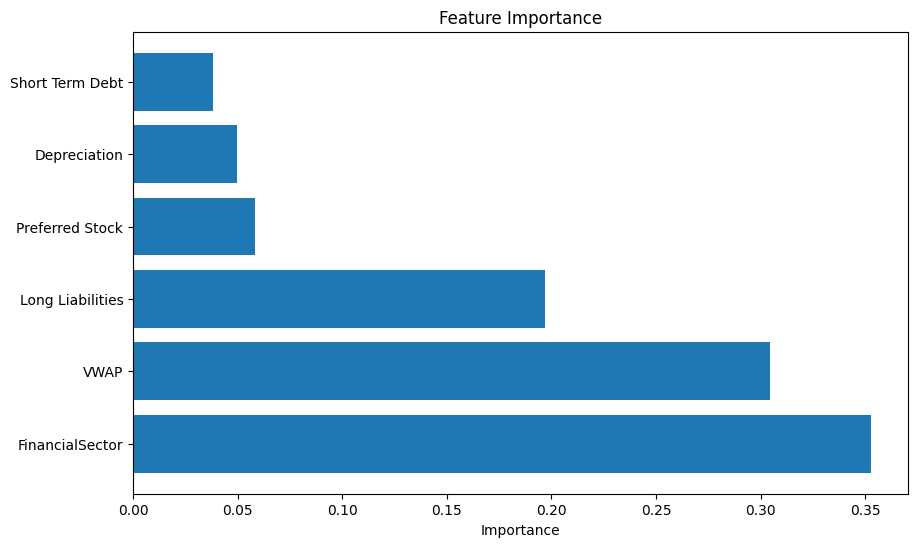

In [ ]:
# Analyze feature importance
feature_importances = best_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the top features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
feature_importance_df.head()

,Feature,Importance
0,FinancialSector,0.352798
1,VWAP,0.304323
2,Long Liabilities,0.196776
4,Preferred Stock,0.058357
5,Depreciation,0.049671


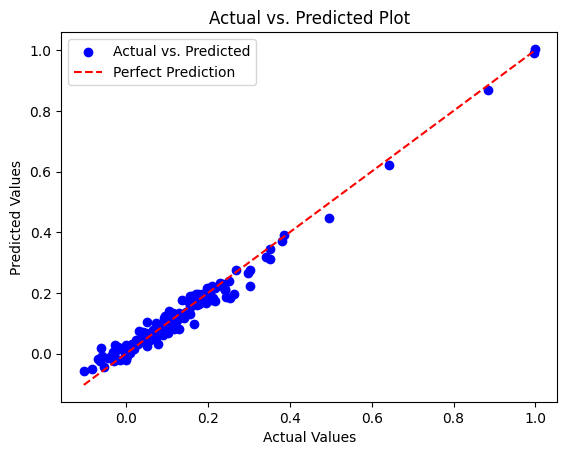

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_train is a pandas Series or NumPy array
actual_values = y_train
predicted_values = best_model.predict(X_train)

plt.scatter(actual_values, predicted_values, c='blue', label='Actual vs. Predicted')
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Plot')
plt.legend()
plt.show()


In [ ]:
# Evaluate the model performance
mse = mean_squared_error(y_train, best_model.predict(X_train))
r2 = r2_score(y_train, best_model.predict(X_train))
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)

print(f'Mean Squared Error on Training Set: {mse}')
print(f'R-squared on Training Set: {r2}')
print(f'Cross-validated R-squared scores: {cv_scores}')



Mean Squared Error on Training Set: 0.00025509227519958697
R-squared on Training Set: 0.981556364470699
Cross-validated R-squared scores: [0.84940408 0.78920616 0.54097938 0.64879583 0.72453188]


In [ ]:
df_test_dropcall = df_test.drop('call_transcript', axis=1)
df_test_dropcall.to_csv('Regression_XGBoost_FineTuned2.csv', index=True)